In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [69]:
data = pd.read_csv('/Users/wafic/Downloads/data/my_say/QAID.csv')

In [70]:
data.head()

,user_id,q_9423,q_9328,q_9326,q_9431,q_9429,q_9435,q_9428,q_9434,q_9433,...,q_9327,q_9492,q_9486,q_9496,q_9620,q_9586,q_9474,q_9477,q_9476,q_9448
0,89,29239,0,0,29264,29258,29284,29253,29278,29276,...,0,0,0,0,0,0,0,0,0,0
1,107,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,173,29239,0,0,29268,29259,29284,29252,29278,29275,...,28937,0,0,0,0,0,0,0,0,0
3,183,29239,0,0,29268,29257,29285,29255,29278,29275,...,0,0,0,0,0,0,0,0,0,0
4,10109,29239,0,0,29268,29259,29281,29252,29278,29273,...,0,0,0,0,0,0,0,0,0,0


In [72]:
data.columns.unique()

Index(['user_id', 'q_9423', 'q_9328', 'q_9326', 'q_9431', 'q_9429', 'q_9435',
       'q_9428', 'q_9434', 'q_9433',
       ...
       'q_9327', 'q_9492', 'q_9486', 'q_9496', 'q_9620', 'q_9586', 'q_9474',
       'q_9477', 'q_9476', 'q_9448'],
      dtype='object', length=255)

In [57]:
data.columns = data.columns.str.replace("q_", "").copy()

In [59]:
df_q = pd.read_csv('/Users/wafic/Downloads/data/my_say/Questions_Answers.csv')

In [60]:
df_q = df_q[(df_q.category_id == 1) | (df_q.category_id == 2) | (df_q.category_id == 3)].copy()

In [61]:
df_q.question_id.unique()

array([21494, 21528, 21529, 21537, 21544, 21545, 21546, 21554, 21570,
       21572, 21598, 21599, 21600, 21601, 21602, 21608, 21632, 21647,
       21649, 21650, 21652, 21653, 21710])

In [62]:
data = data[['21494', '21528', '21529', '21537', '21544', '21545', '21546', '21554', '21570',\
             '21572', '21598', '21599', '21600', '21601', '21602', '21608', '21632', '21647',\
             '21649', '21650', '21652', '21653', '21710']].copy()

KeyError: "['21494' '21528' '21529' '21537' '21544' '21545' '21546' '21554' '21570'\n '21572' '21598' '21599' '21600' '21601' '21602' '21608' '21632' '21647'\n '21649' '21650' '21652' '21653' '21710'] not in index"

In [4]:
df = data.copy()

In [5]:
df.set_index('user_id', inplace=True)

In [6]:
for col in df.columns:
    df[col] = df[col].astype('category')

In [7]:
from pandas.api.types import is_string_dtype, is_numeric_dtype
def numericalize(df, col, name):
    if not is_numeric_dtype(col):
        df[name] = col.cat.codes

In [8]:
for n, c in df.items():
    numericalize(df, c, n)

In [9]:
df.head()

,q_9423,q_9328,q_9326,q_9431,q_9429,q_9435,q_9428,q_9434,q_9433,q_9432,...,q_9327,q_9492,q_9486,q_9496,q_9620,q_9586,q_9474,q_9477,q_9476,q_9448
user_id,,,,,,,,,,,,,,,,,,,,,
89,3,0,0,1,2,4,2,2,4,2,...,0,0,0,0,0,0,0,0,0,0
107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
173,3,0,0,5,3,4,1,2,3,1,...,2,0,0,0,0,0,0,0,0,0
183,3,0,0,5,1,5,4,2,3,1,...,0,0,0,0,0,0,0,0,0,0
10109,3,0,0,5,3,1,1,2,1,1,...,0,0,0,0,0,0,0,0,0,0


In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df)

reduced_data = pca.fit_transform(df)

# Create a DataFrame for the reduced data
pca_df_2 = pd.DataFrame.from_records(reduced_data, index=df.index, columns = ['PC-1', 'PC-2'])
pca_df_2.head()

,PC-1,PC-2
user_id,,
89,15.867406,-0.569065
107,-2.961151,3.499794
173,9.285039,-0.045955
183,0.396108,0.686530
10109,7.756333,0.443236


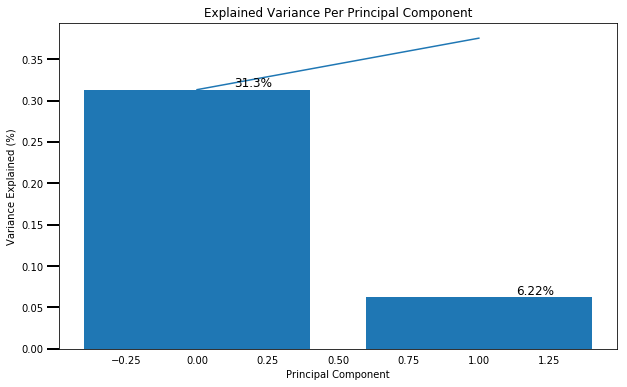

In [14]:
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
    

scree_plot(pca)

### GMM Clustering

In [15]:
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

# Loop through different cluster numbers to see which gives thehighest silhouette score

for n_classes in range(2,8):
    clusterer = GaussianMixture(n_components=n_classes, random_state=0)
    clusterer.fit(reduced_data)
    
    # TODO: Predict the cluster for each data point
    pred = clusterer.predict(reduced_data)
    
    # TODO: Find the cluster centers
    centers = clusterer.means_

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    silhouette_avg = round(silhouette_score(reduced_data, pred), 3)
    print("For n_clusters", n_classes, "the average silhouette_score is: ", silhouette_avg)

For n_clusters 2 the average silhouette_score is:  0.36
For n_clusters 3 the average silhouette_score is:  0.392
For n_clusters 4 the average silhouette_score is:  0.433
For n_clusters 5 the average silhouette_score is:  0.405
For n_clusters 6 the average silhouette_score is:  0.301
For n_clusters 7 the average silhouette_score is:  0.342


In [16]:
clusterer = GaussianMixture(n_components=4, random_state=0)
clusterer.fit(reduced_data)
centers_gmm = clusterer.means_
centers = pd.DataFrame.from_records(centers_gmm, columns = ['A', 'B'])
pred_GMM = clusterer.predict(reduced_data)

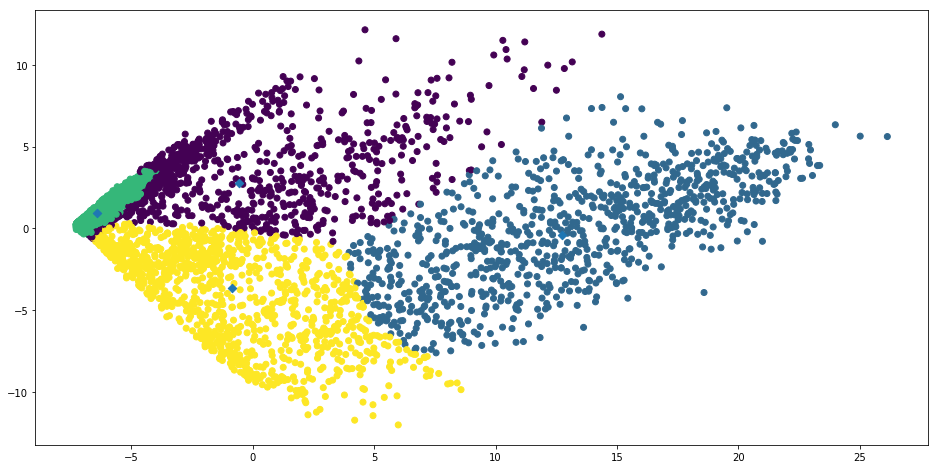

In [17]:
# Display the results of the clustering from implementation
fig=plt.figure(figsize=(16, 8))
plt.scatter(pca_df_2['PC-1'], pca_df_2['PC-2'], c = pred_GMM)
plt.scatter(centers.A, centers.B, marker = 'D')

In [18]:
gm_clusterer = GaussianMixture(n_components=4, random_state=0).fit(df).predict(df)

In [19]:
plt.scatter(gm_clusterer[:,0], gm_clusterer[:,1], c=gm_clusterer, cmap=cmap)

IndexError: too many indices for array

In [186]:
# clusterer.covariances_

In [168]:
# gmm_map = pd.DataFrame()
# gmm_map['data_index'] = df.index.values
# gmm_map['cluster'] = clusterer.covariances_

In [187]:
pred_GMM

array([3, 1, 0, ..., 2, 2, 2])

In [12]:
from sklearn.cluster import KMeans

# Loop through different cluster numbers to see which gives thehighest silhouette score

for n_classes in range(2,8):
    clusterer = KMeans(n_clusters=n_classes, random_state=0)
    clusterer.fit(reduced_data)
    
    # TODO: Predict the cluster for each data point
    pred = clusterer.predict(reduced_data)
    
    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    silhouette_avg = round(silhouette_score(reduced_data, pred), 3)
    print("For n_clusters", n_classes, "the average silhouette_score is: ", silhouette_avg)

NameError: name 'silhouette_score' is not defined

In [188]:
clusterer = KMeans(n_clusters=3, random_state=0)
clusterer.fit(reduced_data)
centers_KMeans = clusterer.cluster_centers_
centers = pd.DataFrame.from_records(centers_KMeans, columns = ['A', 'B'])
pred_Kmeans = clusterer.predict(reduced_data)

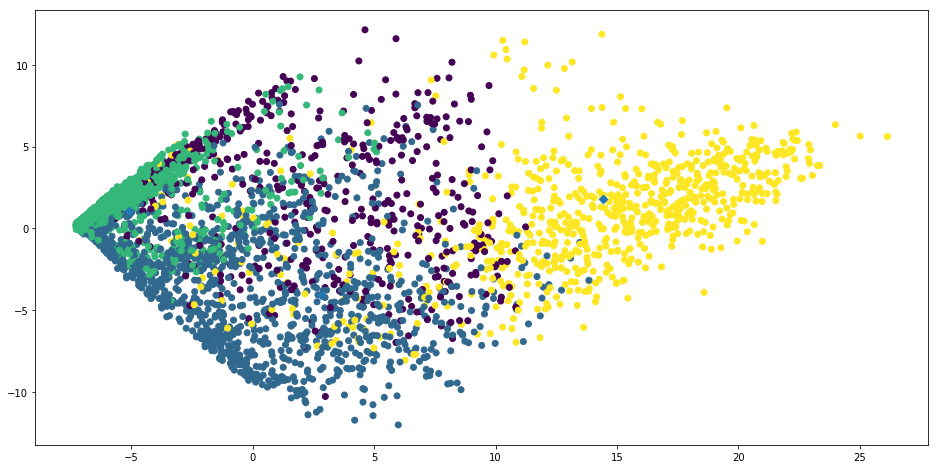

In [189]:
# Display the results of the clustering from implementation
fig=plt.figure(figsize=(16, 8))
plt.scatter(pca_df_2['PC-1'], pca_df_2['PC-2'], c = pred_GMM)
plt.scatter(centers.A, centers.B, marker = 'D')

In [173]:
clusterer = KMeans(n_clusters=5, random_state=0)
clusterer.fit(df)
centers_KMeans = clusterer.cluster_centers_
pred_Kmeans = clusterer.predict(df)

In [179]:
k_mean = pd.DataFrame()
k_mean['data_index'] = df.index.values
k_mean['cluster'] = clusterer.labels_

In [180]:
k_mean.cluster.value_counts()

3    2252
4     684
1     663
2     525
0     389
Name: cluster, dtype: int64

In [204]:
k_mean.to_csv('kmeans_cluster.csv')

In [212]:
k_mean.head()

,data_index,cluster
0,89,1
1,107,3
2,173,0
3,183,2
4,10109,1


In [213]:
df.head()

,q_9423,q_9328,q_9326,q_9431,q_9429,q_9435,q_9428,q_9434,q_9433,q_9432,...,q_9327,q_9492,q_9486,q_9496,q_9620,q_9586,q_9474,q_9477,q_9476,q_9448
user_id,,,,,,,,,,,,,,,,,,,,,
89,3,0,0,1,2,4,2,2,4,2,...,0,0,0,0,0,0,0,0,0,0
107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
173,3,0,0,5,3,4,1,2,3,1,...,2,0,0,0,0,0,0,0,0,0
183,3,0,0,5,1,5,4,2,3,1,...,0,0,0,0,0,0,0,0,0,0
10109,3,0,0,5,3,1,1,2,1,1,...,0,0,0,0,0,0,0,0,0,0


In [214]:
test = pd.read_csv('/Users/wafic/Downloads/data/my_say/User_Question_Answer.csv', low_memory=False)

In [218]:
test.merge(k_mean, left_on='user_id', right_on='data_index', how='right').to_csv('kmean_fll.csv')

In [205]:
from kmodes.kmodes import KModes

In [206]:
np.random.seed(10000)
km = KModes(n_clusters=3, init='Huang', n_init=5, verbose=1, max_iter=100)
label_m = km.fit_predict(df)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 665, cost: 197130.0
Run 1, iteration: 2/100, moves: 281, cost: 195412.0
Run 1, iteration: 3/100, moves: 150, cost: 193906.0
Run 1, iteration: 4/100, moves: 217, cost: 190441.0
Run 1, iteration: 5/100, moves: 73, cost: 190222.0
Run 1, iteration: 6/100, moves: 16, cost: 190201.0
Run 1, iteration: 7/100, moves: 16, cost: 190167.0
Run 1, iteration: 8/100, moves: 2, cost: 190167.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1921, cost: 197077.0
Run 2, iteration: 2/100, moves: 455, cost: 194052.0
Run 2, iteration: 3/100, moves: 228, cost: 189339.0
Run 2, iteration: 4/100, moves: 165, cost: 188199.0
Run 2, iteration: 5/100, moves: 42, cost: 188132.0
Run 2, iteration: 6/100, moves: 3, cost: 188132.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1794, c

In [209]:
k_map = pd.DataFrame()
k_map['data_index'] = df.index.values
k_map['cluster'] = label_m

In [211]:
k_map.to_csv('kmod.csv')

In [219]:
test.merge(k_map, left_on='user_id', right_on='data_index', how='right').to_csv('kmode_fll.csv')